## 🎯 Objective

This bootcamp aims to transform you from complete newcomers into confident practitioners capable of deploying **AI solutions in healthcare**.  
Across five structured sessions of **live coding, hands-on challenges, and interactive learning**, you will:

- ✅ Master the fundamentals of **machine learning** and **data preprocessing**  
- ✅ Build classification models using techniques from **logistic regression** to **advanced ensemble methods**  
- ✅ Evaluate model performance using industry-standard metrics like **accuracy, ROC-AUC, and confusion matrices**  
- ✅ Create **visual insights** to understand data and model behavior  
- ✅ Develop a **portfolio-ready Disease Prediction Toolkit** featuring clean code, documentation, and presentation assets  
- ✅ Experience a **live prediction challenge** simulating real-world healthcare applications  

---

💡 **Our ultimate goal** is to empower you to:  
- Apply these competencies confidently  
- Prepare for **competitive AI/ML roles** in healthcare  
- Create innovations that can **save lives**  

🚀 Let’s embark on this journey to deepen your knowledge, sharpen your skills, and advance your career in **AI-driven health technology!**


# **Upload your kaggle.json to Colab**

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"waqarsadhayo","key":"b43c9648efa4527caf6aee570279982e"}'}

# **Move the token to the correct directory**

In [3]:
import os
import shutil

# Create .kaggle folder
os.makedirs("/root/.kaggle", exist_ok=True)

# Move Kaggle.json into Folder
shutil.move("kaggle.json", "/root/.kaggle/kaggle.json")

'/root/.kaggle/kaggle.json'

# **Set correct file permissions**

In [4]:
! chmod 600 /root/.kaggle/kaggle.json

In [5]:
!pip install kaggle

# **Use kagglehub to download your dataset**

In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("redwankarimsony/heart-disease-data")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/heart-disease-data


# **Load your dataset**

In [7]:
# Find the correct path

print("Dataset downloaded to:", path)
print("Files in dataset folder:", os.listdir(path))


Dataset downloaded to: /kaggle/input/heart-disease-data
Files in dataset folder: ['heart_disease_uci.csv']


In [8]:
import pandas as pd
import os

# Correct file path
file_path = os.path.join(path, "heart_disease_uci.csv")

# Load dataset
df = pd.read_csv(file_path)

# Show first rows
df.head()


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


# **Data Preprocessing**

In [9]:
print(df.columns)

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


In [10]:
df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [12]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [13]:
# Find columns where only numeric values are missing

numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

In [14]:
df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,0
chol,0
fbs,90
restecg,2
thalch,0


# **Data Visualization**

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns


**Histogram**

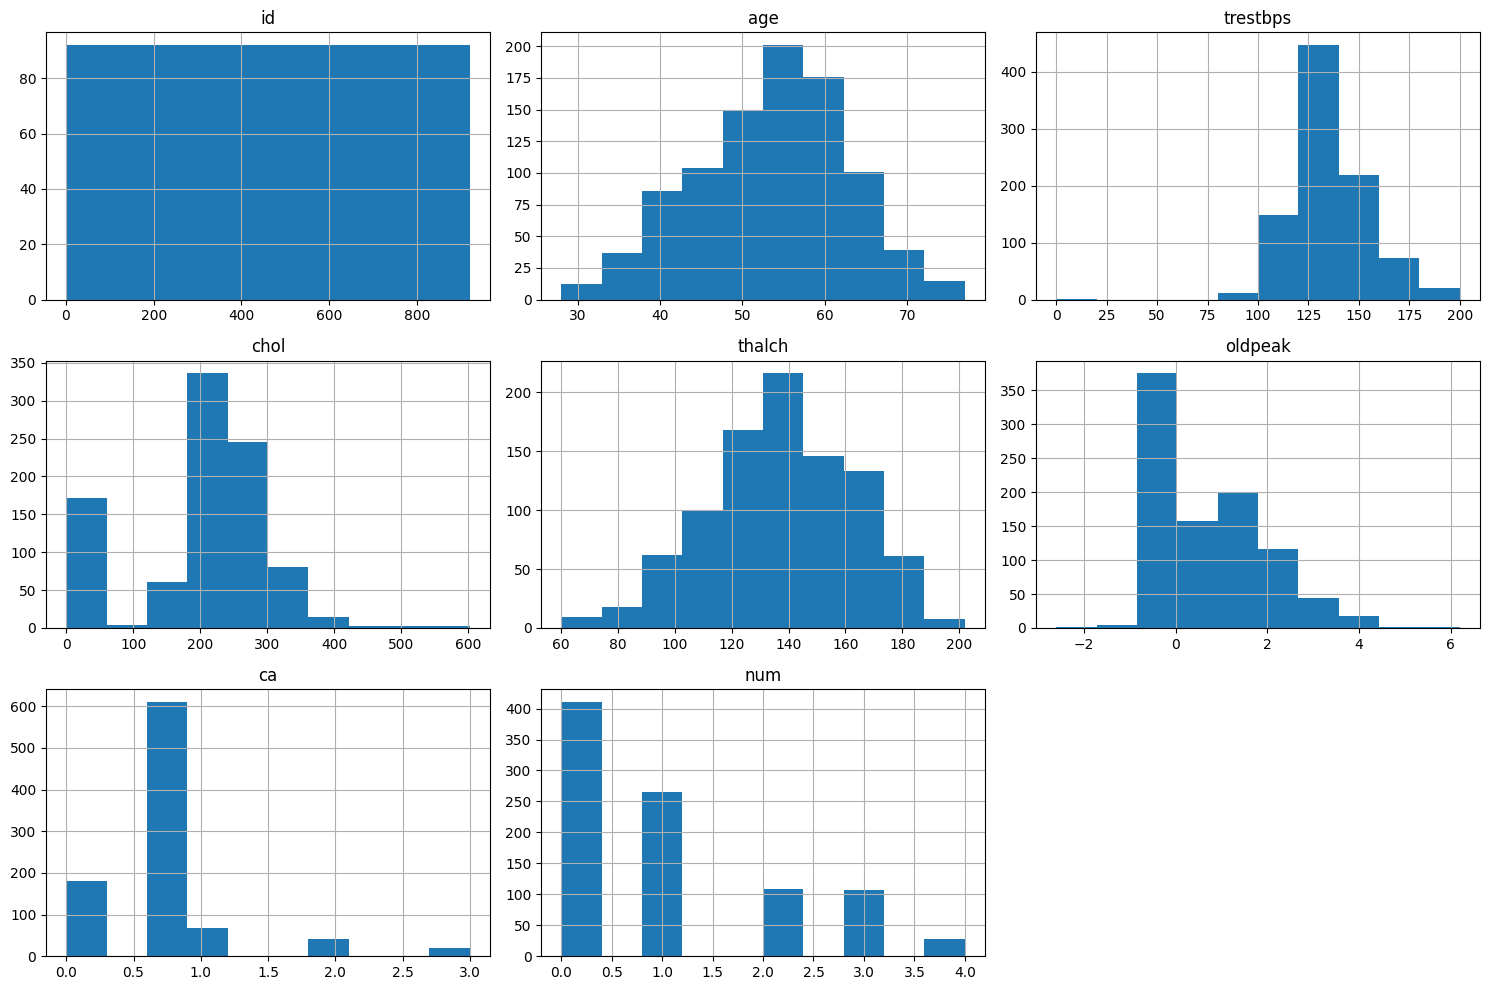

In [16]:
df[numeric_cols].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

**Heat map**

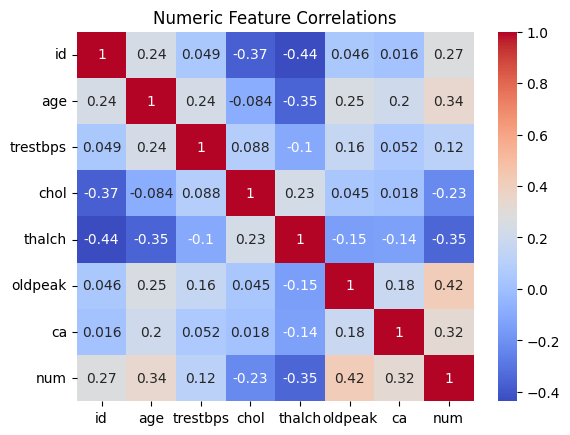

In [17]:
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Numeric Feature Correlations")
plt.show()

# **Model Training**

In [18]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
if 'num' in cat_cols:
  cat_cols.remove('num')

In [19]:
X = df.drop('num', axis = 1)
y = (df['num'] > 0).astype(int)   # 1 -> User Sufferring from heart disease, 0 -> User is not suffering from heart disease

In [20]:
y

,num
0,0
1,1
2,1
3,0
4,0
...,...
915,1
916,0
917,1
918,0


In [21]:
# preprocessing categorical variables.
# Convert catagorical values into numerical values

X = pd.get_dummies(X, columns=cat_cols) # One hot-encode all 'objects' Categorical columns
print("Final Feature Columns", X.columns) # Don't encode target column

Final Feature Columns Index(['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca',
       'sex_Female', 'sex_Male', 'dataset_Cleveland', 'dataset_Hungary',
       'dataset_Switzerland', 'dataset_VA Long Beach', 'cp_asymptomatic',
       'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina',
       'fbs_False', 'fbs_True', 'restecg_lv hypertrophy', 'restecg_normal',
       'restecg_st-t abnormality', 'exang_False', 'exang_True',
       'slope_downsloping', 'slope_flat', 'slope_upsloping',
       'thal_fixed defect', 'thal_normal', 'thal_reversable defect'],
      dtype='object')


In [22]:
X

,id,age,trestbps,chol,thalch,oldpeak,ca,sex_Female,sex_Male,dataset_Cleveland,...,restecg_normal,restecg_st-t abnormality,exang_False,exang_True,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,1,63,145.000000,233.0,150.000000,2.300000,0.000000,False,True,True,...,False,False,True,False,True,False,False,True,False,False
1,2,67,160.000000,286.0,108.000000,1.500000,3.000000,False,True,True,...,False,False,False,True,False,True,False,False,True,False
2,3,67,120.000000,229.0,129.000000,2.600000,2.000000,False,True,True,...,False,False,False,True,False,True,False,False,False,True
3,4,37,130.000000,250.0,187.000000,3.500000,0.000000,False,True,True,...,True,False,True,False,True,False,False,False,True,False
4,5,41,130.000000,204.0,172.000000,1.400000,0.000000,True,False,True,...,False,False,True,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,127.000000,333.0,154.000000,0.000000,0.676375,True,False,False,...,False,True,True,False,False,False,False,False,False,False
916,917,62,132.132404,139.0,137.545665,0.878788,0.676375,False,True,False,...,False,True,False,False,False,False,False,False,False,False
917,918,55,122.000000,223.0,100.000000,0.000000,0.676375,False,True,False,...,False,True,True,False,False,False,False,True,False,False
918,919,58,132.132404,385.0,137.545665,0.878788,0.676375,False,True,False,...,False,False,False,False,False,False,False,False,False,False


# **Train/Test Split, Normalization, Modeling, Model Evaluation**

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
lr_model = LogisticRegression() # creates the model.
lr_model.fit(X_train_scaled, y_train) # trains the model by learning weights from training data.

LogisticRegression()

# **Model Evaluation**

In [28]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [29]:
y_pred_lr = lr_model.predict(X_test_scaled)
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_lr)}")
print(f"\nClassification Report: {classification_report(y_test, y_pred_lr)}")

Logistic Regression Accuracy: 0.842391304347826

Classification Report:               precision    recall  f1-score   support

           0       0.79      0.83      0.81        75
           1       0.88      0.85      0.87       109

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



In [30]:
cm = confusion_matrix(y_test, y_pred_lr)
print(cm)

[[62 13]
 [16 93]]


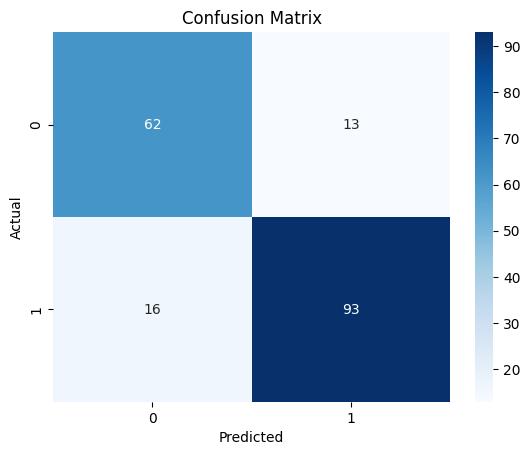

In [31]:
# Plot the Confussion Metrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# **Random Forest & Feature Importance**

**Random Forest**

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
# Step 1: Create a Random Forest Classifier
# n_estimators=100 → use 100 decision trees
# random_state=42 → ensures reproducible results
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 2: Train (fit) the model on training data
# X_train_scaled → training features (already scaled)
# y_train → training labels
rf_model.fit(X_train_scaled, y_train)

# Step 3: Predict the labels for the test dataset
# X_test_scaled → test features (scaled in the same way as training data)
y_pred_rf = rf_model.predict(X_test_scaled)

# Step 4: Evaluate the model using Accuracy Score
# accuracy_score → compares true labels (y_test) with predicted labels (y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf)}")

Random Forest Accuracy: 0.8858695652173914


In [34]:
# Confussion Metrix
cm = confusion_matrix(y_test, y_pred_rf)
print(cm)

[[66  9]
 [12 97]]


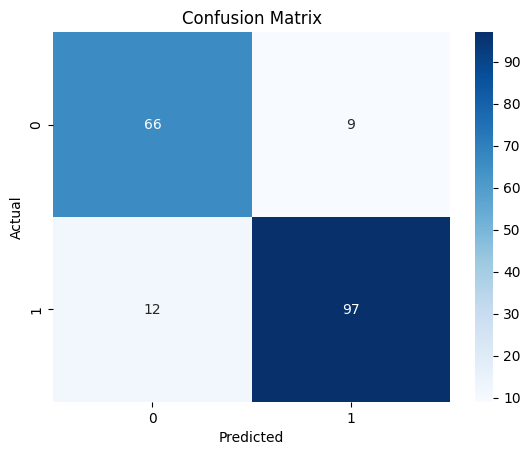

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# **Feature Importane**

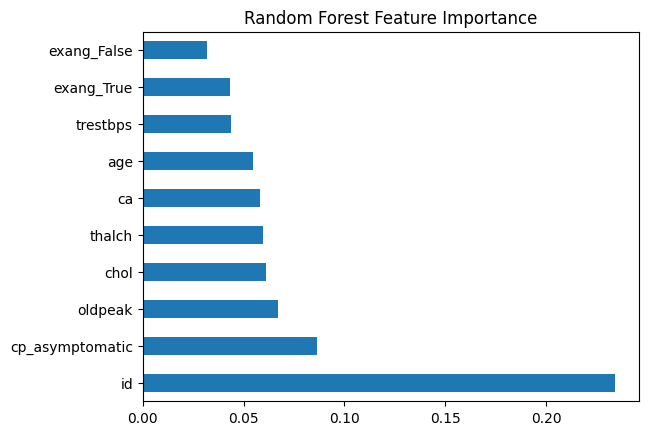

In [36]:
feat_imp = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_imp.nlargest(10).plot(kind="barh")
plt.title("Random Forest Feature Importance")
plt.show()

# **Save the Model**

In [37]:
import joblib

# Save the trained Random Forest model
joblib.dump(rf_model, "heart_disease_rf_model.pkl")


['heart_disease_rf_model.pkl']

In [38]:
# Save the fitted scaler (so test data can be scaled in the same way later)
joblib.dump(scaler, "heart_disease_scaler.pkl")

['heart_disease_scaler.pkl']

In [39]:
sample = X.head(1)
sample.to_csv("Heart_disease_user_template.csv", index=False)
print("User Template saved as 'Heart_disease_user_template.csv' ")

User Template saved as 'Heart_disease_user_template.csv' 


# **User Upload & Prediction**

In [56]:
from google.colab import files
files.upload()

Saving No_Heart_disease_patients.csv to No_Heart_disease_patients.csv


{'No_Heart_disease_patients.csv': b'id,age,trestbps,chol,thalch,oldpeak,ca,sex_Female,sex_Male,dataset_Cleveland,dataset_Hungary,dataset_Switzerland,dataset_VA Long Beach,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,fbs_False,fbs_True,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,exang_False,exang_True,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect\r\n201,35,110,180,175,0.2,0,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE\r\n202,42,120,190,165,0.5,0,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE\r\n203,29,108,170,180,0.1,0,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE\r\n204,40,115,185,170,0.3,0,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE

In [57]:
import joblib
import pandas as pd


user_df = pd.read_csv('/content/No_Heart_disease_patients.csv')

In [58]:
# Getting columns list from training datframe

# Select numerical, categorical, and boolean columns from the training data (df)
numeric_cols = df.select_dtypes(include="number").columns.tolist()
cat_cols = df.select_dtypes(include="object").columns.tolist()
bool_cols = df.select_dtypes(include="bool").columns.tolist()

In [59]:
# Dropping columns which are extra in user_df than required to avoid error
# Keep only those columns that are present in both training data (df) and user input data (user_df)
# This prevents errors if user_df is missing some columns
numeric_cols = [col for col in numeric_cols if col in user_df.columns]
cat_cols = [col for col in cat_cols if col in user_df.columns]
bool_cols = [col for col in bool_cols if col in user_df.columns]

In [60]:
# Handle missing values in numeric columns
# Replace NaN values in numeric columns with the mean of that column (from user_df)
user_df[numeric_cols] = user_df[numeric_cols].fillna(user_df[numeric_cols].mean())

In [61]:
# Handle missing values in categorical columns
# Replace NaN values in categorical columns with the string 'Unknown'
for col in cat_cols:
  user_df[col] = user_df[col].fillna('Unknown')

In [62]:
# Convert boolean columns to integers
# Convert True/False values into 1/0 so that ML models can understand them
for col in bool_cols:
  user_df[col] = user_df[col].astype(int)

In [63]:
# One-hot encoding cat columns
user_df_encoded = pd.get_dummies(user_df, columns=cat_cols)

In [64]:
# Allign Columns
user_df_encoded = user_df_encoded.reindex(columns=X.columns, fill_value=0)

**Scale Data**

In [65]:
# Scale data
scaler = joblib.load('heart_disease_scaler.pkl')
user_df_scaled = scaler.transform(user_df_encoded)

# **Prediction**

In [66]:
model = joblib.load('heart_disease_rf_model.pkl')
prediction = model.predict(user_df_scaled)
user_df["Heart_Disease_Prediction"] = prediction

# ***Show Result***

In [67]:
print(user_df)

    id  age  trestbps  chol  thalch  oldpeak  ca  sex_Female  sex_Male  \
0  201   35       110   180     175      0.2   0        True     False   
1  202   42       120   190     165      0.5   0       False      True   
2  203   29       108   170     180      0.1   0        True     False   
3  204   40       115   185     170      0.3   0       False      True   
4  205   38       118   175     172      0.4   0        True     False   

   dataset_Cleveland  ...  restecg_st-t abnormality  exang_False  exang_True  \
0               True  ...                     False         True       False   
1              False  ...                     False         True       False   
2               True  ...                     False         True       False   
3              False  ...                     False         True       False   
4               True  ...                     False         True       False   

   slope_downsloping  slope_flat  slope_upsloping  thal_fixed defect  \
0 